# Statistics for Data Science by Great Learning
https://www.youtube.com/watch?v=Vfo5le26IhY


## Probability & Statistics

### CardioGood Fitness

Perform descriptive analytics to create a customer profile for each CardioGood Fitness treadmill product line.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
data = pd.read_csv('../../Resources/cardiogoodfitness/CardioGoodFitness.csv')
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [4]:
data.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


Age of average person - Median - 26
Average age of a person - Mean - 28

Skewness - 
- The interval 18 (min) and 26 (median) [diff of 8 years] contain 90 observations
- The interval 26 (median) and 50 (max) [diff of 24 years] contains 90 observations

If mean - median is positive, data is right skewed
If mean - median is negative, data is left skewed

Here, Age data is right skewed

#### Histograms

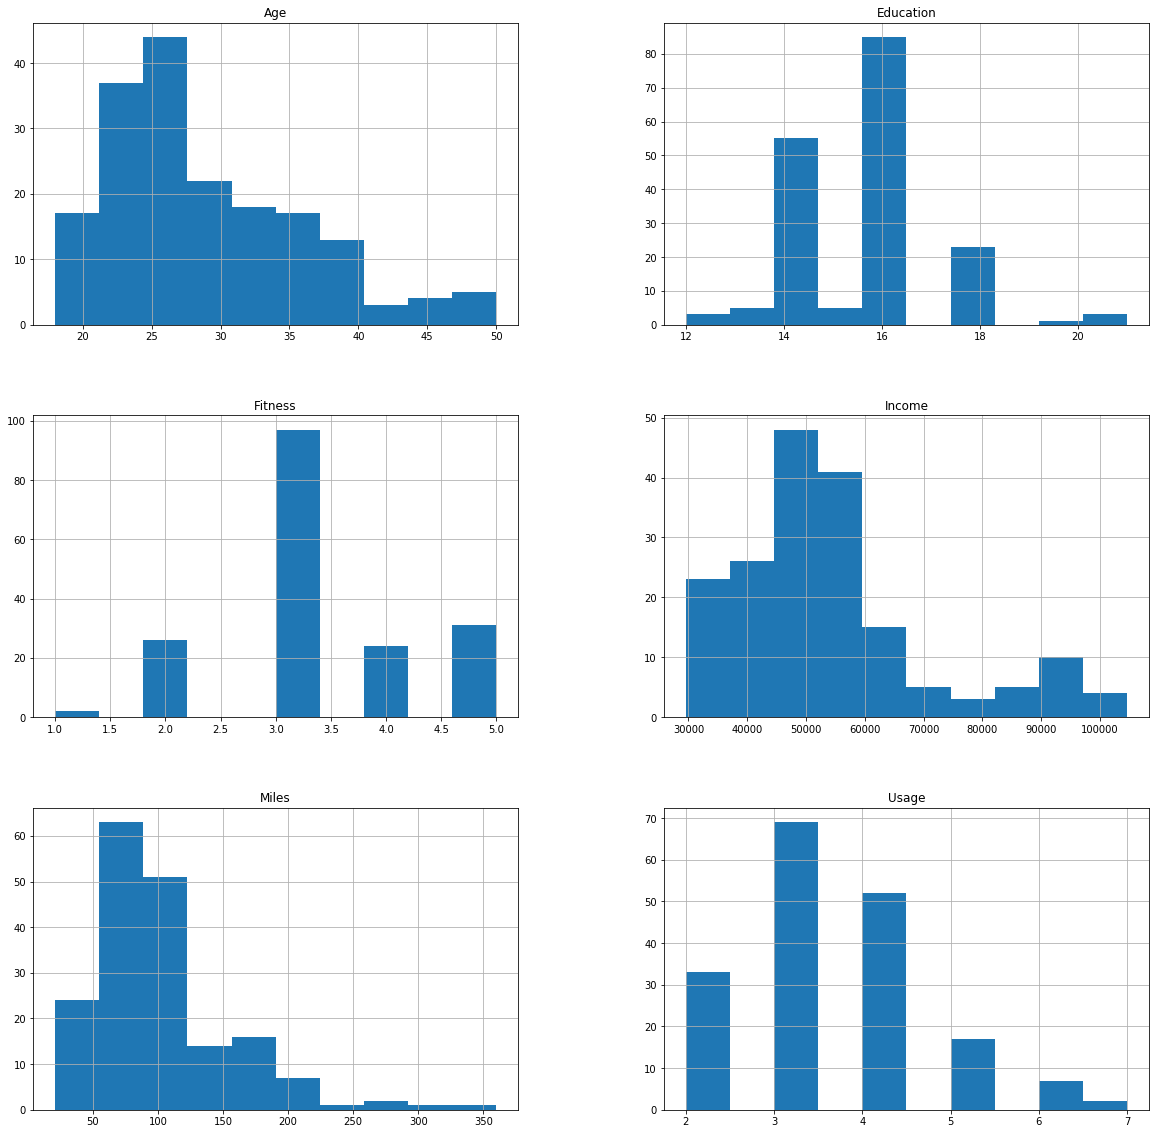

In [5]:
data.hist(figsize=(20, 20), grid=True)
plt.show()

#### Boxplots

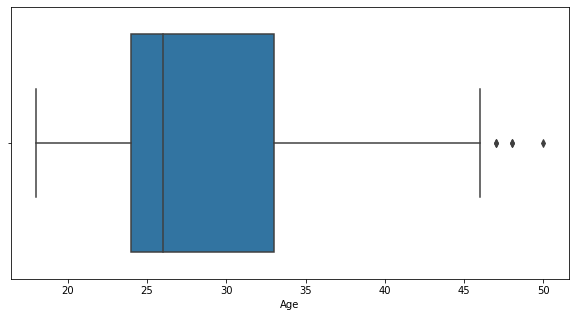

In [6]:
plt.figure(figsize=(10, 5))
sns.boxplot(data['Age'])

#### Crosstabs
Who was using what kind of treadmill?

In [7]:
pd.crosstab(data['Product'], data['Gender'])

Gender,Female,Male
Product,,
TM195,40,40
TM498,29,31
TM798,7,33


In [8]:
pd.crosstab(data['Product'], data['MaritalStatus'])

MaritalStatus,Partnered,Single
Product,,
TM195,48,32
TM498,36,24
TM798,23,17


#### Countplots

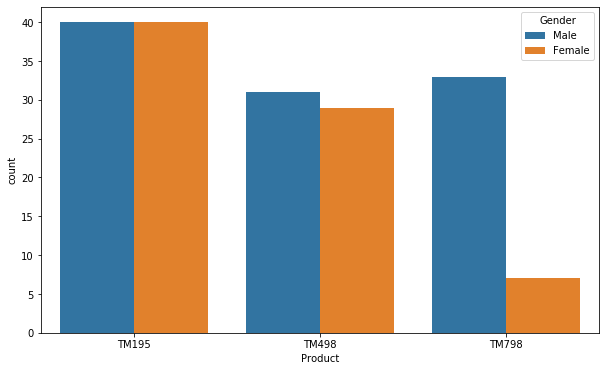

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Product', hue='Gender', data=data)
plt.show()

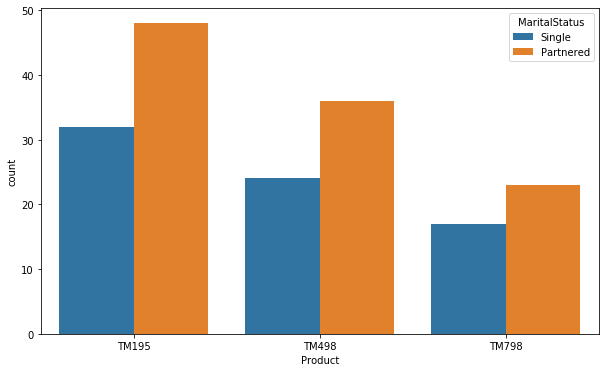

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Product', hue='MaritalStatus', data=data)
plt.show()

#### Pivot table

In [11]:
pd.pivot_table(data, index=['Product', 'Gender'],
               columns=['MaritalStatus'],
               aggfunc=len)

Age        Education          Fitness           Income  \
MaritalStatus  Partnered Single Partnered Single Partnered Single Partnered   
Product Gender                                                                
TM195   Female        27     13        27     13        27     13        27   
        Male          21     19        21     19        21     19        21   
TM498   Female        15     14        15     14        15     14        15   
        Male          21     10        21     10        21     10        21   
TM798   Female         4      3         4      3         4      3         4   
        Male          19     14        19     14        19     14        19   

                          Miles            Usage         
MaritalStatus  Single Partnered Single Partnered Single  
Product Gender                                           
TM195   Female     13        27     13        27     13  
        Male       19        21     19        21     19  
TM498   Female     14        15     14        15     14  
        Male       10        21     10        21     10  
TM798   Female      3         4      3         4      3  
        Male       14        19     14        19     14

In [12]:
pd.pivot_table(data, index=['Product', 'Gender'],
               aggfunc=len)

Age  Education  Fitness  Income  MaritalStatus  Miles  Usage
Product Gender                                                              
TM195   Female   40         40       40      40             40     40     40
        Male     40         40       40      40             40     40     40
TM498   Female   29         29       29      29             29     29     29
        Male     31         31       31      31             31     31     31
TM798   Female    7          7        7       7              7      7      7
        Male     33         33       33      33             33     33     33

#### Correlation, Variance and Covariance

In [13]:
data.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


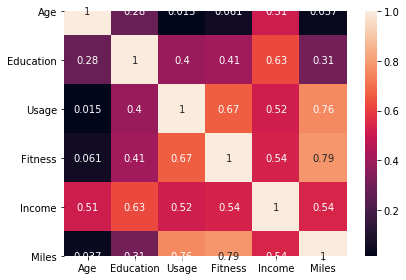

In [20]:
plt.figure(figsize=(6, 4))
sns.heatmap(data.corr(), annot=True)
plt.tight_layout()